In [2]:
import numpy as np  
from scipy import misc  
from PIL import Image  
import glob  
import matplotlib.pyplot as plt  
import scipy.misc  
from matplotlib.pyplot import imshow  
%matplotlib inline
from IPython.display import SVG  
import cv2
import seaborn as sn  
import pandas as pd  
import pickle  
from keras import layers  
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout  
from keras.models import Sequential, Model, load_model  
from keras.preprocessing import image  
from keras.preprocessing.image import load_img  
from keras.preprocessing.image import img_to_array  
from keras.applications.imagenet_utils import decode_predictions  
from keras.utils import layer_utils, np_utils  
from keras.utils.data_utils import get_file  
from keras.applications.imagenet_utils import preprocess_input  
from keras.utils.vis_utils import model_to_dot  
from keras.utils import plot_model  
from keras.initializers import glorot_uniform  
from keras import losses  
import keras.backend as K  
from keras.callbacks import ModelCheckpoint  
from sklearn.metrics import confusion_matrix, classification_report  
import tensorflow as tf  

Using TensorFlow backend.


In [8]:
from keras.datasets import cifar100
(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode="fine")

In [4]:
print(x_train_original.shape)

(50000, 32, 32, 3)


In [5]:
print(y_train_original)

[[19]
 [29]
 [ 0]
 ...
 [ 3]
 [ 7]
 [73]]


In [9]:
#Pasar a Formato One Hot Encoding
y_train = np_utils.to_categorical(y_train_original,100)
y_test = np_utils.to_categorical(y_test_original,100)

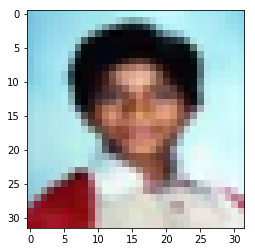

In [7]:
imgplot = plt.imshow(x_train_original[3])
plt.show()

In [10]:
def resize_data(data):  
    data_upscaled = np.zeros((data.shape[0], 48, 48, 3))
    for i, img in enumerate(data):
        large_img = cv2.resize(img, dsize=(48, 48), interpolation=cv2.INTER_CUBIC)
        data_upscaled[i] = large_img

    return data_upscaled

In [11]:
x_train_resized = resize_data(x_train_original)  
x_test_resized = resize_data(x_test_original)  

In [12]:
x_train_resized = x_train_resized / 255  
x_test_resized = x_test_resized / 255 

In [11]:
# imágenes re-escaladas 48 píxeles normalizadas en x_train_resized y x_test_resized.

## Crear Model VGG-16

In [22]:
from keras.applications import vgg16

def create_vgg16():  
  model = vgg16.VGG16(include_top=True, weights=None, input_tensor=None, input_shape=(48,48,3), pooling=None, classes=100)
  return model

In [13]:
# Los parámetros son sencillos: 
# vamos a incluir una red neuronal densa al final con el parámetro include_top.
# No cargamos ningún modelo entrenado a priori con el parámetro weights. 
# No especificamos ningún tensor de keras como entrada con input_tensor. 
# Definimos la forma de los datos de entrada con input_shape. 
# No especificamos Pooling final con pooling y definimos el número de clases final con classes.

In [23]:
vgg16_model = create_vgg16()
vgg16_model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['acc', 'mse'])

In [24]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [25]:
vgg16 = vgg16_model.fit(x=x_train_resized, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test_resized, y_test), shuffle=False)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 214s 4ms/step - loss: 4.6053 - acc: 0.0092 - mean_squared_error: 0.0099 - val_loss: 4.6051 - val_acc: 0.0113 - val_mean_squared_error: 0.0099
Epoch 2/10
50000/50000 [==============================] - 173s 3ms/step - loss: 4.6053 - acc: 0.0097 - mean_squared_error: 0.0099 - val_loss: 4.6050 - val_acc: 0.0125 - val_mean_squared_error: 0.0099
Epoch 3/10
50000/50000 [==============================] - 176s 4ms/step - loss: 4.6051 - acc: 0.0112 - mean_squared_error: 0.0099 - val_loss: 4.6047 - val_acc: 0.0161 - val_mean_squared_error: 0.0099
Epoch 4/10
50000/50000 [==============================] - 178s 4ms/step - loss: 4.6047 - acc: 0.0158 - mean_squared_error: 0.0099 - val_loss: 4.6040 - val_acc: 0.0195 - val_mean_squared_error: 0.0099
Epoch 5/10
50000/50000 [==============================] - 178s 4ms/step - loss: 4.6033 - acc: 0.0191 -

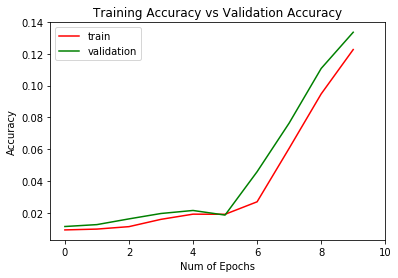

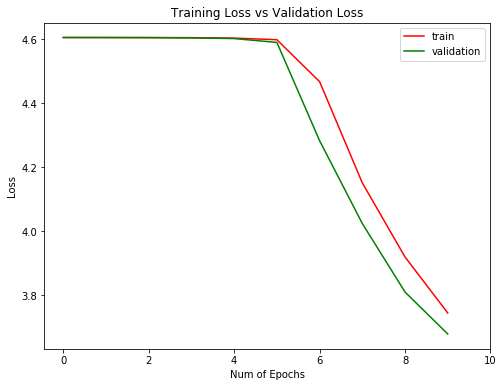

In [26]:
plt.figure(0)  
plt.plot(vgg16.history['acc'],'r')  
plt.plot(vgg16.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(vgg16.history['loss'],'r')  
plt.plot(vgg16.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()  

In [27]:
vgg16_pred = vgg16_model.predict(x_test_resized, batch_size=32, verbose=1)  
vgg16_predicted = np.argmax(vgg16_pred, axis=1)  

10000/10000 [==============================] - 9s 877us/step


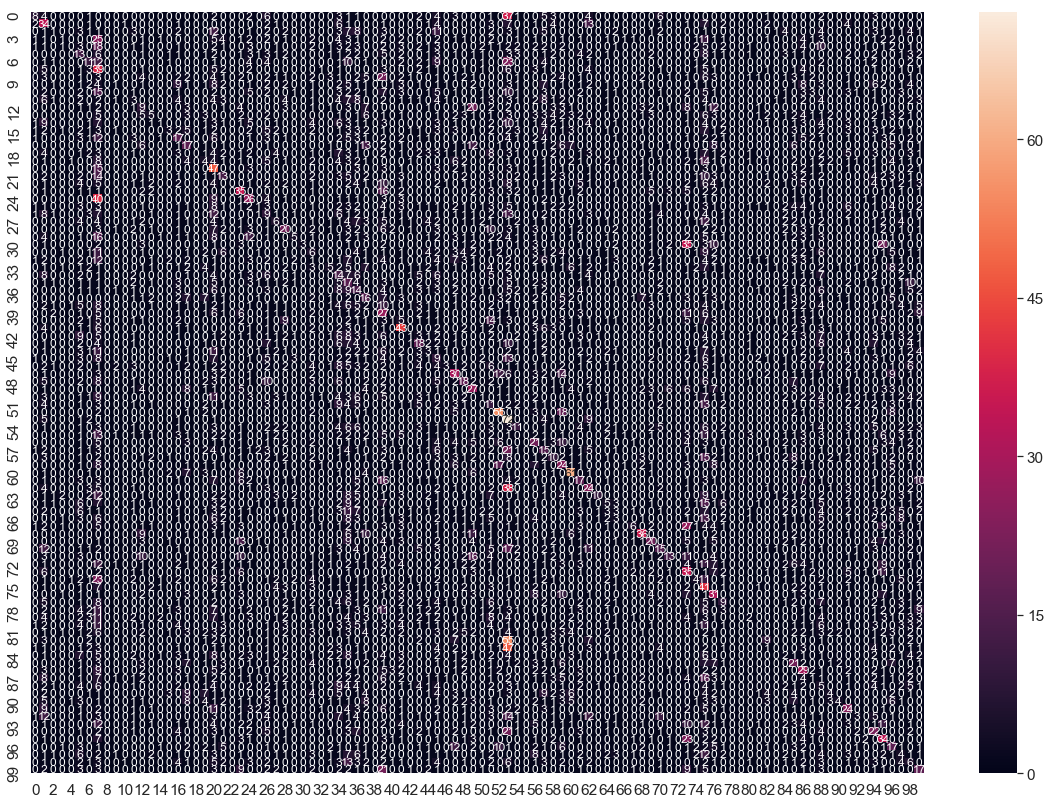

In [28]:
#Creamos la matriz de confusión
vgg16_cm = confusion_matrix(np.argmax(y_test, axis=1), vgg16_predicted)

# Visualiamos la matriz de confusión
vgg16_df_cm = pd.DataFrame(vgg16_cm, range(100), range(100))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(vgg16_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [29]:
vgg16_report = classification_report(np.argmax(y_test, axis=1), vgg16_predicted)  
print(vgg16_report)

              precision    recall  f1-score   support

           0       0.33      0.08      0.13       100
           1       0.14      0.34      0.20       100
           2       0.07      0.01      0.02       100
           3       0.08      0.01      0.02       100
           4       0.00      0.00      0.00       100
           5       0.08      0.13      0.10       100
           6       0.17      0.11      0.13       100
           7       0.06      0.39      0.11       100
           8       0.00      0.00      0.00       100
           9       0.09      0.01      0.02       100
          10       0.00      0.00      0.00       100
          11       0.06      0.03      0.04       100
          12       0.10      0.09      0.10       100
          13       0.17      0.05      0.08       100
          14       0.10      0.01      0.02       100
          15       0.18      0.03      0.05       100
          16       0.16      0.17      0.16       100
          17       0.15    

C:\Users\Valken\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Valken\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Valken\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


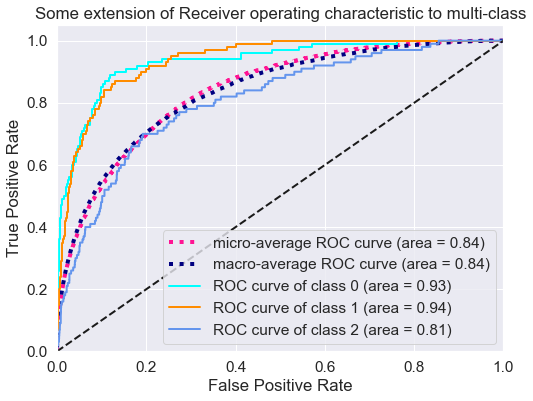

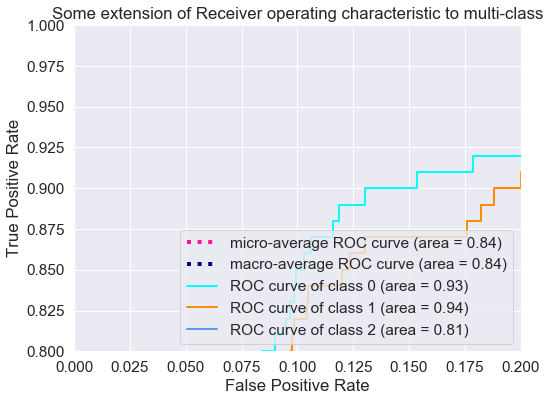

In [30]:
from sklearn.datasets import make_classification  
from sklearn.preprocessing import label_binarize  
from scipy import interp  
from itertools import cycle

n_classes = 100

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()  
tpr = dict()  
roc_auc = dict()  
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], vgg16_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), vgg16_pred.ravel())  
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)  
for i in range(n_classes):  
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr  
tpr["macro"] = mean_tpr  
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(n_classes-97), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)  
plt.xlim(0, 0.2)  
plt.ylim(0.8, 1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(3), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()  

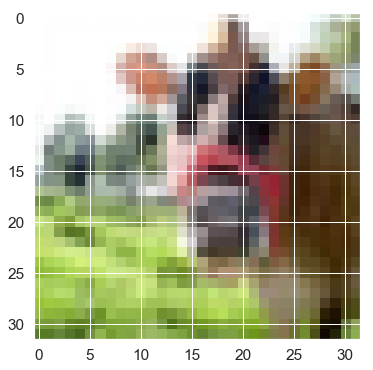

class for image 1: 49
predicted:         39


In [31]:
imgplot = plt.imshow(x_train_original[0])  
plt.show()  
print('class for image 1: ' + str(np.argmax(y_test[0])))  
print('predicted:         ' + str(vgg16_predicted[0]))  

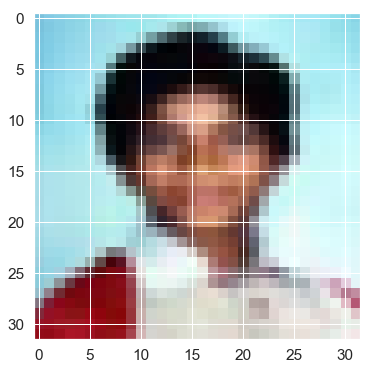

class for image 3: 51
predicted:         54


In [32]:
imgplot = plt.imshow(x_train_original[3])  
plt.show()  
print('class for image 3: ' + str(np.argmax(y_test[3])))  
print('predicted:         ' + str(vgg16_predicted[3]))  

In [36]:
#Histórico
with open('vgg16_history.txt', 'wb') as file_pi:  
    pickle.dump(vgg16.history, file_pi)

# VGG19

In [14]:
from keras.applications import vgg19

In [15]:
def create_vgg19():  
  model = vgg19.VGG19(include_top=True, weights=None, input_tensor=None, input_shape=(48,48,3), pooling=None, classes=100)

  return model

vgg19_model = create_vgg19()  
vgg19_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])  

In [19]:
vgg19_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [20]:
vgg19 = vgg19_model.fit(x=x_train_resized, y=y_train, batch_size=32, epochs=10, verbose=1, 
                        validation_data=(x_test_resized, y_test), shuffle=True)  

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 216s 4ms/step - loss: 4.6054 - acc: 0.0084 - mean_squared_error: 0.0099 - val_loss: 4.6052 - val_acc: 0.0100 - val_mean_squared_error: 0.0099
Epoch 2/10
50000/50000 [==============================] - 212s 4ms/step - loss: 4.6053 - acc: 0.0084 - mean_squared_error: 0.0099 - val_loss: 4.6052 - val_acc: 0.0100 - val_mean_squared_error: 0.0099
Epoch 3/10
50000/50000 [==============================] - 212s 4ms/step - loss: 4.6053 - acc: 0.0093 - mean_squared_error: 0.0099 - val_loss: 4.6051 - val_acc: 0.0128 - val_mean_squared_error: 0.0099
Epoch 4/10
50000/50000 [==============================] - 212s 4ms/step - loss: 4.6053 - acc: 0.0091 - mean_squared_error: 0.0099 - val_loss: 4.6051 - val_acc: 0.0100 - val_mean_squared_error: 0.0099
Epoch 5/10
50000/50000 [==============================] - 219s 4ms/step - loss: 4.6053 - acc: 0.0097 -

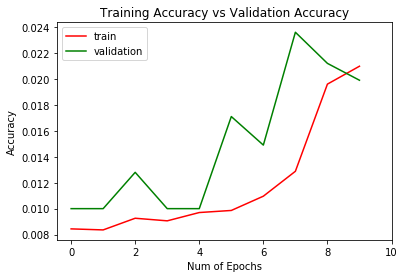

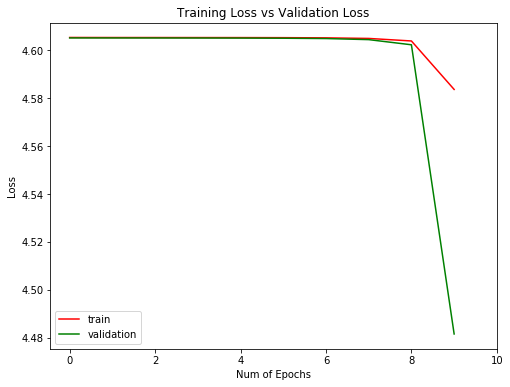

In [21]:
plt.figure(0)  
plt.plot(vgg19.history['acc'],'r')  
plt.plot(vgg19.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(vgg19.history['loss'],'r')  
plt.plot(vgg19.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show() 

In [22]:
vgg19_pred = vgg19_model.predict(x_test_resized, batch_size=32, verbose=1)  
vgg19_predicted = np.argmax(vgg19_pred, axis=1)  

10000/10000 [==============================] - 11s 1ms/step


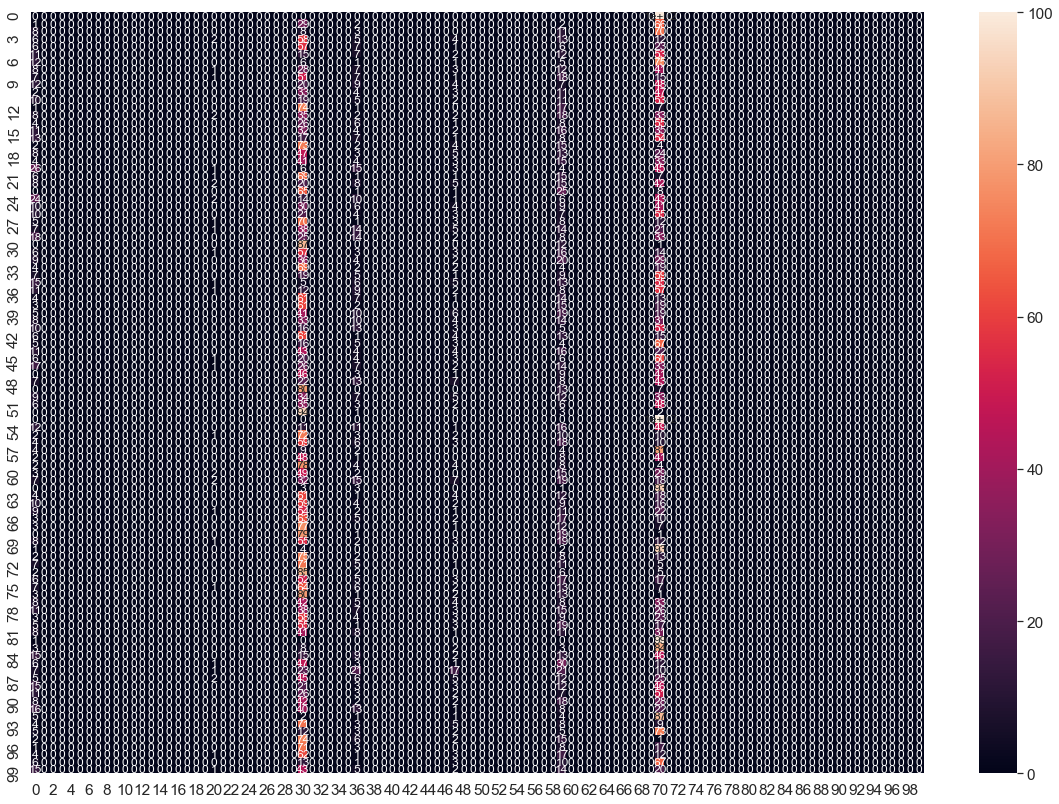

In [23]:
#Creamos la matriz de confusión
vgg19_cm = confusion_matrix(np.argmax(y_test, axis=1), vgg19_predicted)

# Visualiamos la matriz de confusión
vgg19_df_cm = pd.DataFrame(vgg19_cm, range(100), range(100))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(vgg19_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show() 

In [24]:
vgg19_report = classification_report(np.argmax(y_test, axis=1), vgg19_predicted)  
print(vgg19_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.00      0.00      0.00       100
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00       100
          16       0.00      0.00      0.00       100
          17       0.00    

C:\Users\Valken\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Valken\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Valken\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


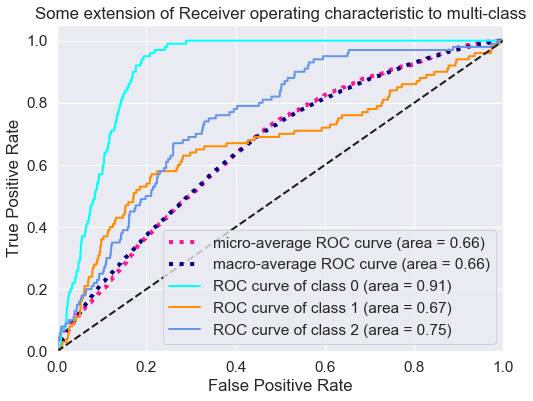

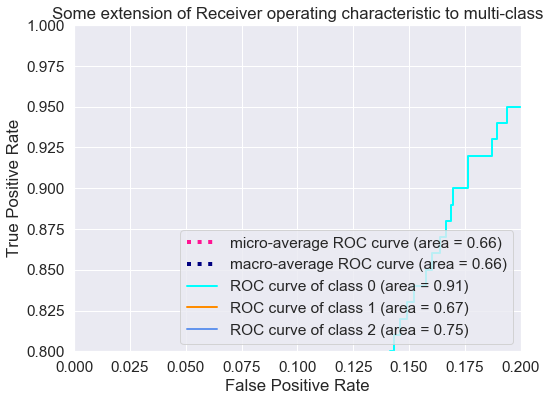

In [25]:
from sklearn.datasets import make_classification  
from sklearn.preprocessing import label_binarize  
from scipy import interp  
from itertools import cycle

n_classes = 100

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()  
tpr = dict()  
roc_auc = dict()  
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], vgg19_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), vgg19_pred.ravel())  
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)  
for i in range(n_classes):  
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr  
tpr["macro"] = mean_tpr  
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(n_classes-97), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)  
plt.xlim(0, 0.2)  
plt.ylim(0.8, 1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(3), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()  

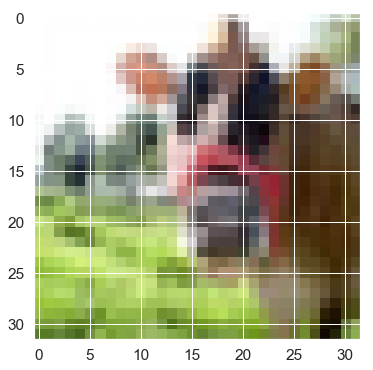

class for image 1: 49
predicted:         59


In [26]:
imgplot = plt.imshow(x_train_original[0])  
plt.show()  
print('class for image 1: ' + str(np.argmax(y_test[0])))  
print('predicted:         ' + str(vgg19_predicted[0]))  

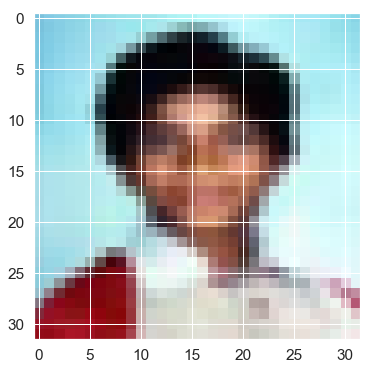

class for image 3: 51
predicted:         30


In [27]:
imgplot = plt.imshow(x_train_original[3])  
plt.show()  
print('class for image 3: ' + str(np.argmax(y_test[3])))  
print('predicted:         ' + str(vgg19_predicted[3]))  

In [28]:
#Histórico
with open('vgg19_history.txt', 'wb') as file_pi:  
  pickle.dump(vgg19.history, file_pi)

In [52]:
with open('vgg16_history.txt', 'rb') as f:  
  vgg16_history = pickle.load(f)

In [54]:
with open('simplenn_history.txt', 'rb') as f:  
  snn_history = pickle.load(f)

In [55]:
with open('scnn_history.txt', 'rb') as f:  
  scnn_history = pickle.load(f)

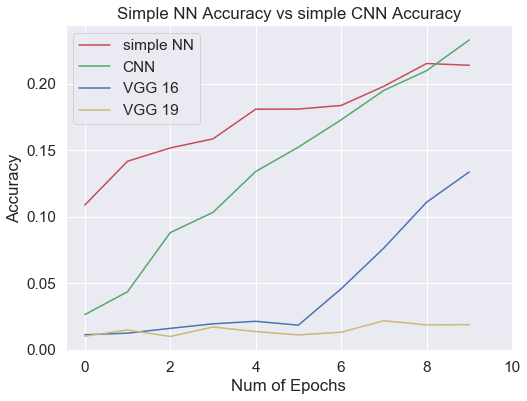

In [56]:
plt.figure(0)  
plt.plot(snn_history['val_acc'],'r')  
plt.plot(scnn_history['val_acc'],'g')  
plt.plot(vgg16_history['val_acc'],'b')  
plt.plot(vgg19.history['val_acc'],'y')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Simple NN Accuracy vs simple CNN Accuracy")  
plt.legend(['simple NN','CNN','VGG 16','VGG 19'])

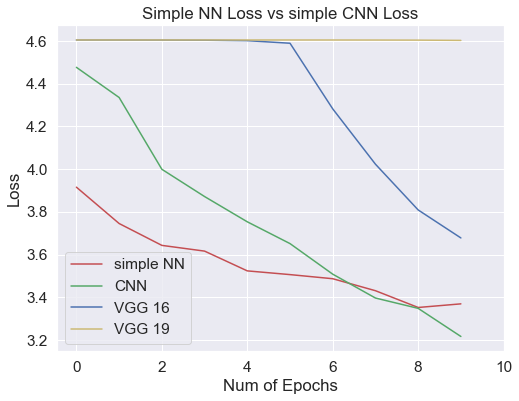

In [57]:
plt.figure(0)  
plt.plot(snn_history['val_loss'],'r')  
plt.plot(scnn_history['val_loss'],'g')  
plt.plot(vgg16.history['val_loss'],'b')  
plt.plot(vgg19.history['val_loss'],'y')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Simple NN Loss vs simple CNN Loss")  
plt.legend(['simple NN','CNN','VGG 16','VGG 19'])  

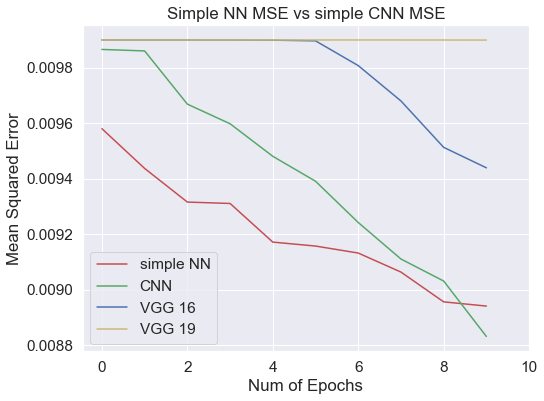

In [58]:
plt.figure(0)  
plt.plot(snn_history['val_mean_squared_error'],'r')  
plt.plot(scnn_history['val_mean_squared_error'],'g')  
plt.plot(vgg16.history['val_mean_squared_error'],'b')  
plt.plot(vgg19.history['val_mean_squared_error'],'y')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Mean Squared Error")  
plt.title("Simple NN MSE vs simple CNN MSE")  
plt.legend(['simple NN','CNN','VGG 16','VGG 19'])  

# CUSTOM VGG 

In [68]:
x_train = x_train_original / 255
x_test = x_test_original / 255

In [65]:
def VGG16_Without_lastPool(include_top=True, input_tensor=None, input_shape=(32,32,3), pooling=None, classes=100):
    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    
    #Block 1
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2,2), strides=(2,2), name='block1_pool')(x) #to 16x16
    
    #Block 2
    x = Conv2D(128, (3,3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3,3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2,2), strides=(2,2), name='block2_pool')(x) #to 16x16
    
    #Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x) #to 4x4
    
    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x) #to 2x2
    
    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    #x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
    
    if include_top:
        #Clasisification block
        x = Flatten(name='flatten')(x)
        x = Dense(4096, activation='relu', name='fc1')(x)
        x = Dense(4096, activation='relu', name='fc2')(x)
        x = Dense(classes, activation='softmax', name='predictions')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)
    
    #Create Model
    model = Model(img_input, x, name='vgg16Bis')
    return model

In [66]:
def create_vgg16WithoutPool():
    model = VGG16_Without_lastPool(include_top=True, input_tensor=None, input_shape=(32,32,3), pooling=None, classes=100)
    
    return model
vgg16Bis_model = create_vgg16WithoutPool()
vgg16Bis_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])

In [67]:
vgg16Bis_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [69]:
vgg16Bis = vgg16Bis_model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1, 
                              validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 160s 3ms/step - loss: 4.6054 - acc: 0.0093 - mean_squared_error: 0.0099 - val_loss: 4.6051 - val_acc: 0.0103 - val_mean_squared_error: 0.0099
Epoch 2/10
50000/50000 [==============================] - 138s 3ms/step - loss: 4.6053 - acc: 0.0095 - mean_squared_error: 0.0099 - val_loss: 4.6051 - val_acc: 0.0116 - val_mean_squared_error: 0.0099
Epoch 3/10
50000/50000 [==============================] - 138s 3ms/step - loss: 4.6053 - acc: 0.0099 - mean_squared_error: 0.0099 - val_loss: 4.6050 - val_acc: 0.0112 - val_mean_squared_error: 0.0099
Epoch 4/10
50000/50000 [==============================] - 138s 3ms/step - loss: 4.6052 - acc: 0.0112 - mean_squared_error: 0.0099 - val_loss: 4.6048 - val_acc: 0.0136 - val_mean_squared_error: 0.0099
Epoch 5/10
50000/50000 [==============================] - 138s 3ms/step - loss: 4.6049 - acc: 0.0132 - mean_squared_error: 0.0099 - val_loss: 4.6045 -

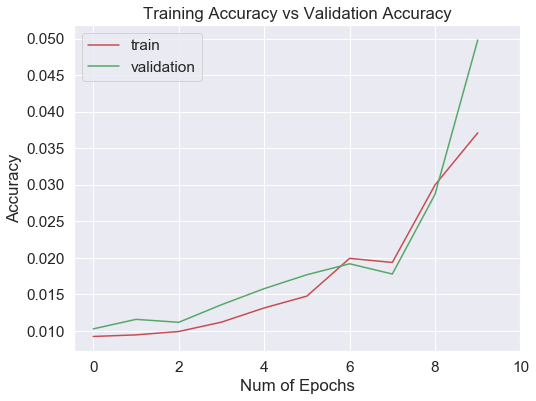

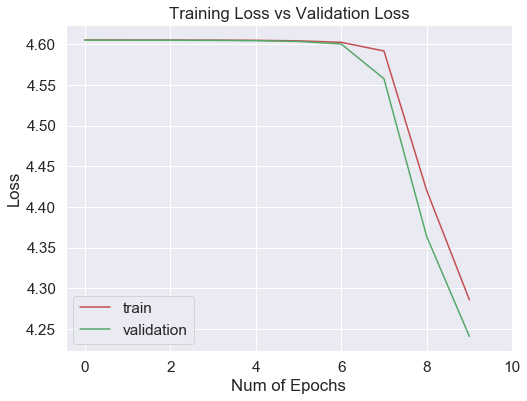

In [70]:
plt.figure(0)  
plt.plot(vgg16Bis.history['acc'],'r')  
plt.plot(vgg16Bis.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(vgg16Bis.history['loss'],'r')  
plt.plot(vgg16Bis.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()  

10000/10000 [==============================] - 6s 579us/step


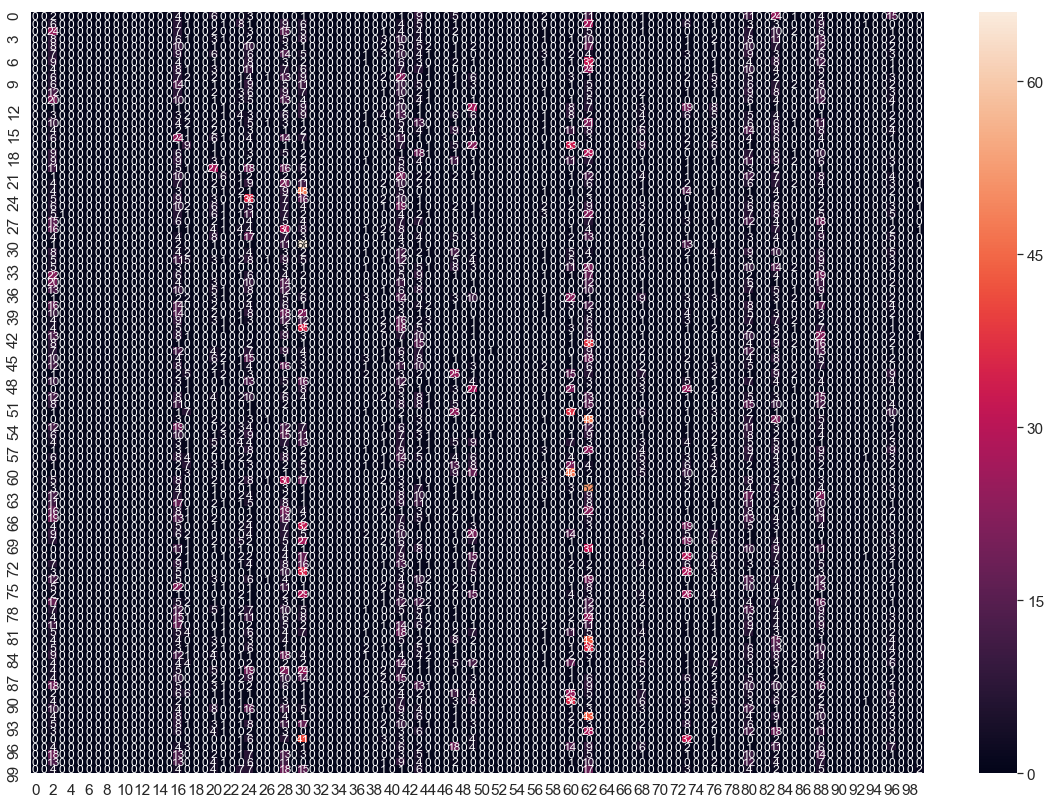

In [71]:
vgg16Bis_pred = vgg16Bis_model.predict(x_test, batch_size=32, verbose=1)  
vgg16Bis_predicted = np.argmax(vgg16Bis_pred, axis=1)

vgg_cm = confusion_matrix(np.argmax(y_test, axis=1), vgg16Bis_predicted)

# Visualizing of confusion matrix
vgg_df_cm = pd.DataFrame(vgg_cm, range(100), range(100))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(vgg_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [72]:
vgg_report = classification_report(np.argmax(y_test, axis=1), vgg16Bis_predicted)  
print(vgg_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.03      0.24      0.06       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.00      0.00      0.00       100
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00       100
          16       0.04      0.24      0.06       100
          17       0.09    

C:\Users\Valken\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Valken\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Valken\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


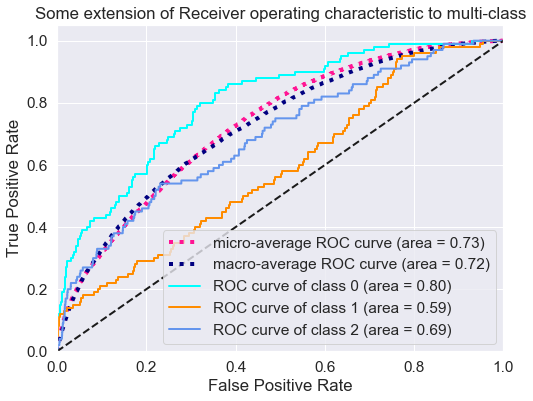

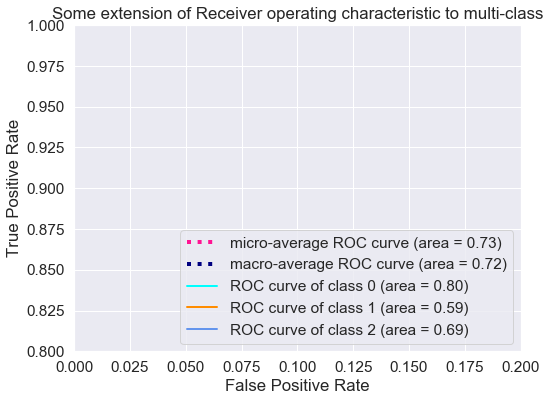

In [73]:
from sklearn.datasets import make_classification  
from sklearn.preprocessing import label_binarize  
from scipy import interp  
from itertools import cycle

n_classes = 100

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()  
tpr = dict()  
roc_auc = dict()  
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], vgg16Bis_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), vgg16Bis_pred.ravel())  
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)  
for i in range(n_classes):  
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr  
tpr["macro"] = mean_tpr  
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(n_classes-97), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)  
plt.xlim(0, 0.2)  
plt.ylim(0.8, 1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(3), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()  

In [75]:
#Histórico
with open('cvgg16_history.txt', 'wb') as file_pi:  
  pickle.dump(vgg16Bis.history, file_pi)

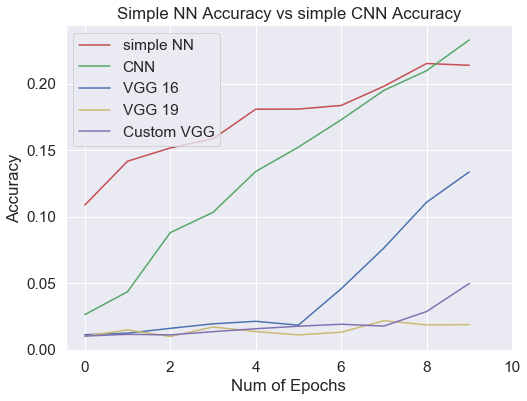

In [76]:
plt.figure(0)  
plt.plot(snn_history['val_acc'],'r')  
plt.plot(scnn_history['val_acc'],'g')  
plt.plot(vgg16.history['val_acc'],'b')  
plt.plot(vgg19.history['val_acc'],'y')  
plt.plot(vgg16Bis.history['val_acc'],'m')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Simple NN Accuracy vs simple CNN Accuracy")  
plt.legend(['simple NN','CNN','VGG 16','VGG 19','Custom VGG'])  

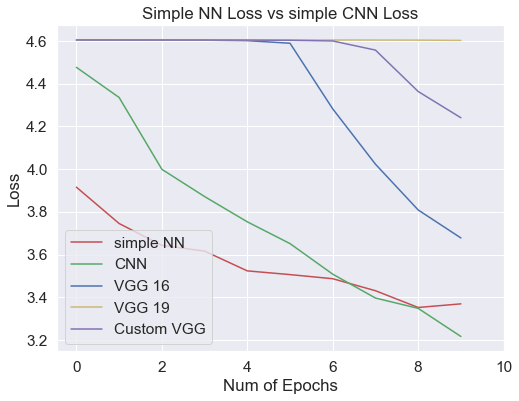

In [77]:
plt.figure(0)  
plt.plot(snn_history['val_loss'],'r')  
plt.plot(scnn_history['val_loss'],'g')  
plt.plot(vgg16.history['val_loss'],'b')  
plt.plot(vgg19.history['val_loss'],'y')  
plt.plot(vgg16Bis.history['val_loss'],'m')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Simple NN Loss vs simple CNN Loss")  
plt.legend(['simple NN','CNN','VGG 16','VGG 19','Custom VGG'])  

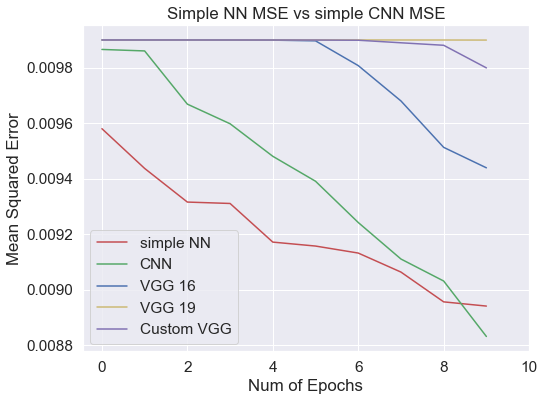

In [78]:
plt.figure(0)  
plt.plot(snn_history['val_mean_squared_error'],'r')  
plt.plot(scnn_history['val_mean_squared_error'],'g')  
plt.plot(vgg16.history['val_mean_squared_error'],'b')  
plt.plot(vgg19.history['val_mean_squared_error'],'y')  
plt.plot(vgg16Bis.history['val_mean_squared_error'],'m')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Mean Squared Error")  
plt.title("Simple NN MSE vs simple CNN MSE")  
plt.legend(['simple NN','CNN','VGG 16','VGG 19','Custom VGG'])  